<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Eye_crop1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#顔の画像から目を検出して切り抜くスクリプト
・Haarcascade_eyeを使用<br>
・目が検出できないものはskipする<br>
・対応表をCSV形式で出力（連番、左右、元フォルダ、元画像名）

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import csv
from random import randint
from time import sleep

import glob
import random
from PIL import Image
%matplotlib inline

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

plt.ion()   # interactive mode

#Google colabをマウント

In [2]:
'''
変換前
--in-----1-----abc.jpg
      |    |--def.jpg
      |
      |-2-----ghi.jpg     
           |--jkl.jpg

変換後
--out-------1.jpg
        |--2,jpg        
        |--3.jpg
        |--4.jpg
'''

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#元画像フォルダ
in_path = '/content/drive/My Drive/Deep_learning/eyelid_images/in/'

#保存先フォルダ
out_path = '/content/drive/My Drive/Deep_learning/eyelid_images/out/'

#CSVファイルのフォルダ
csv_path = '/content/drive/My Drive/Deep_learning/eyelid_images/eyelid_images.csv'


#Haarcascadeを指定

In [0]:
# カスケードファイルのパス
eye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_eye.xml'

# カスケード分類器の特徴量取得
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

#画像を切り抜いて連番で出力、対応表出力
12時間で60000枚を処理するのは不可能（1秒間に3枚として12000枚 =フォルダ1600個ぐらいが限界）<br>
→1回のセッションでフォルダ1000個ずつを処理することとする

In [15]:
with open(csv_path, 'a', newline='') as f:  #a:追記モード
        writer = csv.writer(f)
        fieldnames = ['Number', 'Folder', 'FileName']       
        writer.writerow(['Number', 'side (R:0, L:1)', 'Folder',  'ImageName'])  #header


        k=0
        directory = os.listdir(in_path)
        print(len(directory))
        processing_directory = directory[0:999]　#ここにフォルダ番号を記載する (ex. [0:999])

        for i in processing_directory:  #フォルダ数の分だけ
              file = os.listdir(in_path + '//' + i)
              for j in file:
                    print('')
                    img = cv2.imread(in_path + '//' + i + '//' + j) 
                    img2 = img.copy()

                    # 画像グレースケール化
                    grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

                    #300pix以上のもので目に見えるものを抽出
                    eye_list = eye_cascade.detectMultiScale(grayscale_img, minSize=(300, 300))

                    print('image path = '+ in_path + '//' + i + '//' + j )
                    # 眼検出判定
                    if len(eye_list) >= 1:
                        print('目が' + str(len(eye_list)) +'個検出されました')
                    else:
                        print("eye detection error")
                    
                    #画像の切り抜きと保存（連番にする）
                    m=0
                    for (ex, ey, ew, eh) in eye_list:
                        print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))
                        try:
                          cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                          img_cropped = img[int(ey-0.1*eh): int(ey+1.1*eh), int(ex-0.1*ew): int(ex+1.1*ew)]
                          img_resized = cv2.resize(img_cropped,(250,250)) #1辺250pixにresize 
                          x, y = random.randint(0,27), random.randint(0,27) #ランダムな位置で224pixに切り取る
                          img_randcrop = img_resized[y: y+223, x: x+223]
                        except:
                            pass

                        if ex <= 600:
                            side = 0 #600ピクセル目より左にあるのは右眼
                        else:
                            side = 1 #600ピクセル目より右にあるのは左眼

                        print('/content/drive/My Drive/Deep_learning/eyelid_images/out/'+str(k+1)+'.jpg')
                        
                        #保存する際のよくわからないエラーをskipする
                        try:
                            cv2.imwrite('/content/drive/My Drive/Deep_learning/eyelid_images/out/'+str(k+1)+'.jpg', img_randcrop)
                            #対応表の作成
                            writer.writerow([str(k+1), side, str(i), str(j)])
                            m+=1
                            k+=1
                        except:
                            pass

print('Process done!!'))

8196

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in///7213//20091216105257_眼位_O_0_881f815eed7ee3d4b69af2d4cb7851bb7c4275328941e3ee843eac239163bd5d.jpg
目が2個検出されました
[ex,ey] = 270,300 [ew,eh] = 551,551
/content/drive/My Drive/Deep_learning/eyelid_images/out/1.jpg
[ex,ey] = 1316,327 [ew,eh] = 562,562
/content/drive/My Drive/Deep_learning/eyelid_images/out/2.jpg

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in///7213//20091216105257_眼位_O_0_a0889b192d9aa7c676050e5313446070160526fffebaebb7f15f09a67ebd2734.jpg
目が2個検出されました
[ex,ey] = 217,398 [ew,eh] = 551,551
/content/drive/My Drive/Deep_learning/eyelid_images/out/3.jpg
[ex,ey] = 1224,375 [ew,eh] = 647,647
/content/drive/My Drive/Deep_learning/eyelid_images/out/4.jpg

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in///7213//20090617090816_眼位_O_-1_b42ed2596337593f7980c83e07bff9b0bde57c6831dbb63b77c4616be3fb13d3.JPG
目が2個検出されました
[ex,ey] = 1273,395 [ew,eh] = 539,539
/content/drive/My Drive

#切り取られた図を表示してみる

['.ipynb_checkpoints', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg']


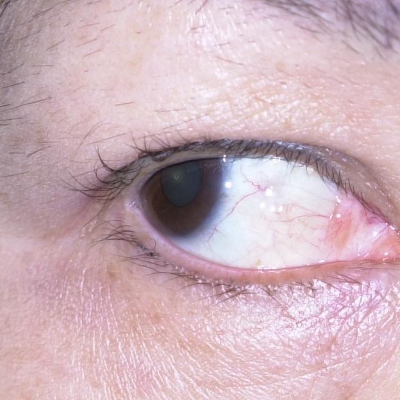

In [0]:
img_list = os.listdir('/content/drive/My Drive/Deep_learning/eyelid_images/out')
print(img_list)
img = cv2.imread('/content/drive/My Drive/Deep_learning/eyelid_images/out/'+img_list[12])


#アスペクト比を維持したまま横を400pixelに縮小する
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)
dst = scale_to_width(img, 400)

#図を表示する
cv2_imshow(dst)